Kenneth Reed
HW6

# Analysis
* There is a clear trend of warmer temperatures as you approach the equator from either the northern or southern hemispheres. The northern hemisphere temperatures drop lower than the southern hemisphere, which makes sense as we are into fall in the north for that date.
* There is a slightly heavier grouping of humidity from the equator toward the northern hemisphere. A quick weather search shows three tropical or post-tropical storms for this date: Leslie, Kirk, and Rosa, which probably account for the cloudiness.
* There does not seem to be a relationship for cloudiness and latitude. There are groupings at 0, 75, and 90 or so, but that may indicate trends in reporting. Zero is the easiest--a clear day will be marked as zero. 75 could be a "three-quarter" coverage reporting, but 90 seems a bit more arbitrary.
* The heaviest groupings of wind speed are 1) fairly evenly distributed by latitude and 2) probably within normal wind speed. The higher speeds appear more toward the poles. There is one higher wind speed at around 30º, and that is close to where sub-tropical storm Leslie is currently.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time as tm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
# Create dataframe from cities
cities_df = pd.DataFrame({'City':cities})

cities_df["Cloudiness"] = np.NaN
cities_df["Country"] = np.NaN
cities_df["Date"] = ""
cities_df["Humidity"] = np.NaN
cities_df["Lat"] = np.NaN
cities_df["Lng"] = np.NaN
cities_df["Max Temp"] = np.NaN
cities_df["Wind Speed"] = np.NaN

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create settings dictionary with information we're interested in
#settings = {"units": "metric", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/"
weather = "weather?"
# Imperial uses Fahrenheit, miles/hour; Time of data calculation, unix, UTC 
units = "units=Imperial"
record_number = 1
    
print("Beginning Data Retrieval")
print("------------------------------")
# Loop through the cities_test_df

for index, row in cities_df.iterrows():
    city = row['City']

    # Add a one second interval between queries to stay within API query limits
    tm.sleep(1)
    # make request
    response = requests.get(url + weather + units + "&APPID=" + api_key + "&q=" + city)

    print(f"Processing Record {record_number} of Set 1 | {city}")
    # print the responses
    print(response.url)
    record_number += 1
     
    # convert to json
    response = response.json()

    #cities_copy_df = cities_df.copy()
    
    try:
    #if response['cod'] == 200:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except KeyError:
        cities_df.loc[index, 'City'] = np.NaN
        print(f"{city} returned no results. Skipping...")
    pass

print("------------------------------")
print("Done")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=upernavik
Processing Record 2 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bluff
Processing Record 3 of Set 1 | urzhum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=urzhum
Processing Record 4 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=butaritari
Processing Record 5 of Set 1 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=trelew
Processing Record 6 of Set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=lorengau
Processing Record 7 of Set 1 | ossora
ht

Processing Record 54 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=vaitupu
vaitupu returned no results. Skipping...
Processing Record 55 of Set 1 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mayumba
Processing Record 56 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=chuy
Processing Record 57 of Set 1 | mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mahajanga
Processing Record 58 of Set 1 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=chapais
Processing Record 59 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=vaini
Processing Record 60 of Set 1 | new norfolk
http://api.open

Processing Record 105 of Set 1 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=skibbereen
Processing Record 106 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nikolskoye
Processing Record 107 of Set 1 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=abu%20dhabi
Processing Record 108 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bethel
Processing Record 109 of Set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bambous%20virieux
Processing Record 110 of Set 1 | nawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nawa
Processing Record 111 of Set 1 | khandbari
http://api.openwe

Processing Record 157 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kapaa
Processing Record 158 of Set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=ostrovnoy
Processing Record 159 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=katsuura
Processing Record 160 of Set 1 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=yanam
Processing Record 161 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=hithadhoo
Processing Record 162 of Set 1 | nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nizwa
Processing Record 163 of Set 1 | progreso
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 208 of Set 1 | muriwai beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=muriwai%20beach
Processing Record 209 of Set 1 | virginia beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=virginia%20beach
Processing Record 210 of Set 1 | rodez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rodez
Processing Record 211 of Set 1 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=meyungs
meyungs returned no results. Skipping...
Processing Record 212 of Set 1 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=halifax
Processing Record 213 of Set 1 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=luderitz
Processing Record 2

Processing Record 259 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=saldanha
Processing Record 260 of Set 1 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=fortuna
Processing Record 261 of Set 1 | nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nadym
Processing Record 262 of Set 1 | louth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=louth
Processing Record 263 of Set 1 | walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=walvis%20bay
Processing Record 264 of Set 1 | siusega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=siusega
Processing Record 265 of Set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/we

Processing Record 311 of Set 1 | boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=boende
Processing Record 312 of Set 1 | tolaga bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tolaga%20bay
Processing Record 313 of Set 1 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=byron%20bay
Processing Record 314 of Set 1 | duki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=duki
Processing Record 315 of Set 1 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kavieng
Processing Record 316 of Set 1 | fernie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=fernie
Processing Record 317 of Set 1 | yeletskiy
http://api.openweathermap.org/data/2.5/we

Processing Record 362 of Set 1 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=yeppoon
Processing Record 363 of Set 1 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kaitangata
Processing Record 364 of Set 1 | inyonga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=inyonga
Processing Record 365 of Set 1 | samarinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=samarinda
Processing Record 366 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=pevek
Processing Record 367 of Set 1 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nemuro
Processing Record 368 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weat

Processing Record 414 of Set 1 | hunchun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=hunchun
Processing Record 415 of Set 1 | warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=warqla
warqla returned no results. Skipping...
Processing Record 416 of Set 1 | haselunne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=haselunne
Processing Record 417 of Set 1 | mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mocuba
Processing Record 418 of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=port%20lincoln
Processing Record 419 of Set 1 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=beira
Processing Record 420 of Set 1 | jerusal

Processing Record 466 of Set 1 | west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=west%20bay
Processing Record 467 of Set 1 | pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=pacifica
Processing Record 468 of Set 1 | ksenyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=ksenyevka
ksenyevka returned no results. Skipping...
Processing Record 469 of Set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=salalah
Processing Record 470 of Set 1 | plavsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=plavsk
Processing Record 471 of Set 1 | manbij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=manbij
Processing Record 472 of Set 1 | ginda


Processing Record 519 of Set 1 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=dhidhdhoo
Processing Record 520 of Set 1 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nhulunbuy
Processing Record 521 of Set 1 | mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mnogovershinnyy
Processing Record 522 of Set 1 | farsund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=farsund
Processing Record 523 of Set 1 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=lolua
lolua returned no results. Skipping...
Processing Record 524 of Set 1 | sargatskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=sargatskoye
Processing Record 525

Processing Record 570 of Set 1 | formosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=formosa
Processing Record 571 of Set 1 | albemarle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=albemarle
Processing Record 572 of Set 1 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=aguimes
Processing Record 573 of Set 1 | pokrovsk-uralskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=pokrovsk-uralskiy
pokrovsk-uralskiy returned no results. Skipping...
Processing Record 574 of Set 1 | tonantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tonantins
Processing Record 575 of Set 1 | sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=sayyan
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [6]:
# Display the row counts
cities_df.count()

City          549
Cloudiness    549
Country       549
Date          617
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [7]:
# Display the DataFrame
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,upernavik,68.0,GL,1538146201,100.0,72.79,-56.15,33.13,10.22
1,bluff,0.0,AU,1538146202,69.0,-23.58,149.07,66.52,9.89
2,urzhum,88.0,RU,1538146203,88.0,57.11,50.00,44.47,13.24
3,butaritari,48.0,KI,1538146205,100.0,3.07,172.79,85.15,8.99
4,trelew,0.0,AR,1538146206,65.0,-43.25,-65.31,60.94,18.84


In [9]:
# Set date to mm/dd/yyyy
date = cities_df.loc[index, 'Date']
date = tm.strftime('%m/%d/%Y')
date

'09/28/2018'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

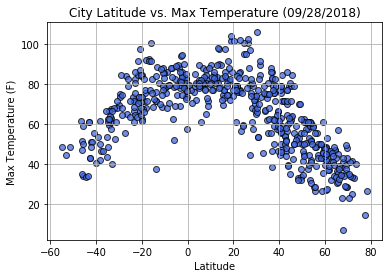

In [11]:
# Incorporate the graph properties    
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

temperature = plt.gcf()
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
temperature.savefig('images/temperature.png', dpi=100)

#### Latitude vs. Humidity Plot

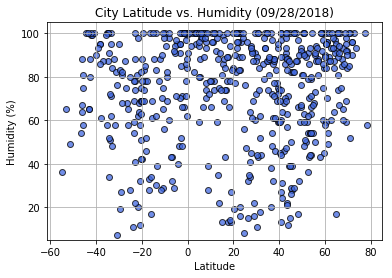

In [20]:
plt.grid(True)
plt.ylim(5,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

humid = plt.gcf()
plt.scatter(cities_df['Lat'], cities_df['Humidity'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
humid.savefig('images/humidity.png', dpi=100)

#### Latitude vs. Cloudiness Plot

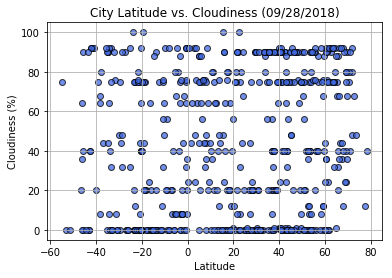

In [18]:
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

cloudiness = plt.gcf()
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)

cloudiness.savefig('images/cloudiness.png', dpi=100)


#### Latitude vs. Wind Speed Plot

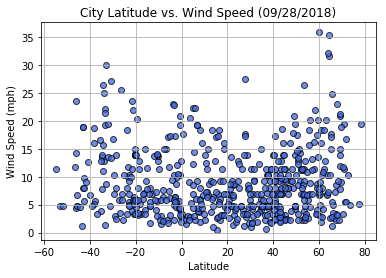

In [21]:
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

wind = plt.gcf()
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
wind.savefig('images/wind.png', dpi=100)